In [1]:
# Google Colb用に必要なパッケージのインストール
!pip install torchinfo
!pip install einops

In [2]:
# Google driveにマウント
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/spring_school_0321')

Mounted at /content/drive


In [3]:
import os
import glob
import matplotlib.pyplot as plt

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from einops import rearrange
from scipy.signal import find_peaks

In [9]:
class AIdetector:
    def __init__(self, model_path):
        # device指定
        self.device = torch.device('cpu')
        # モデルパラメータのロード
        self.model = torch.load(model_path, map_location=self.device, weights_only=False)
        # モデルを評価モードへの着替え
        self.model.eval()

    def pred(self, input_data):
        with torch.no_grad():
            inputs = input_data.float().to(self.device)
            outputs = self.model(inputs)
        return outputs

In [5]:
waves = torch.load('/content/drive/MyDrive/spring_school_0321/data/test_data.pt')
labels_CLA = torch.load('/content/drive/MyDrive/spring_school_0321/data/test_label_for_CLA.pt')
labels_SEG = torch.load('/content/drive/MyDrive/spring_school_0321/data/test_label_for_SEG.pt')

In [10]:
detector = AIdetector('/content/drive/MyDrive/spring_school_0321/model2_Epoch100/model_epoch_20.pth')

tensor([48,  0])


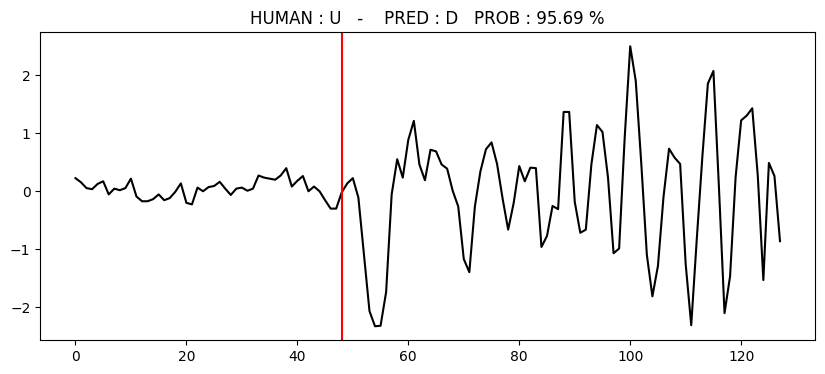

tensor([55,  0])


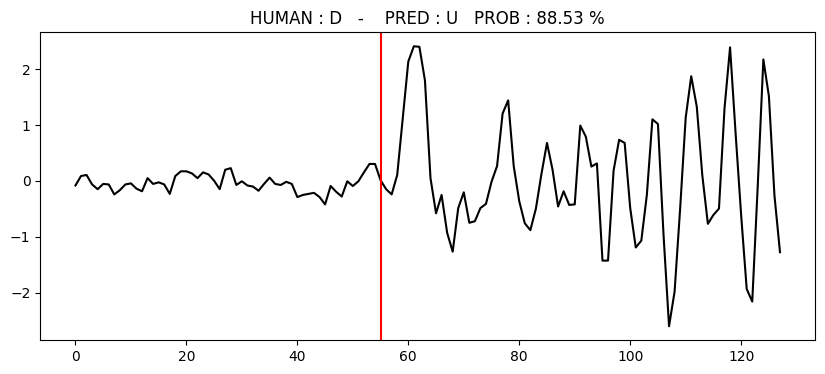

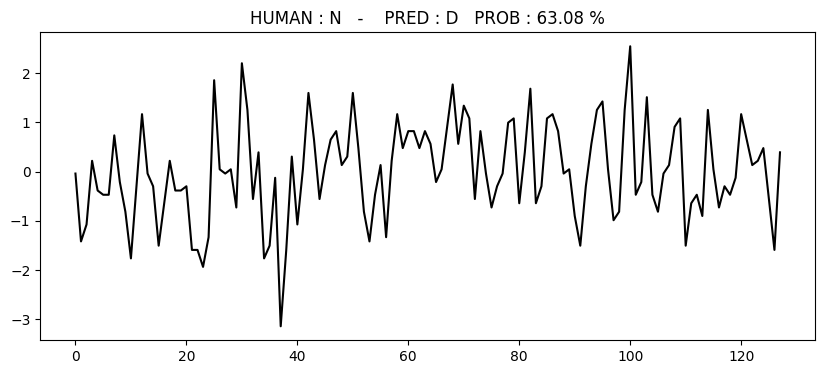

tensor([71,  0])


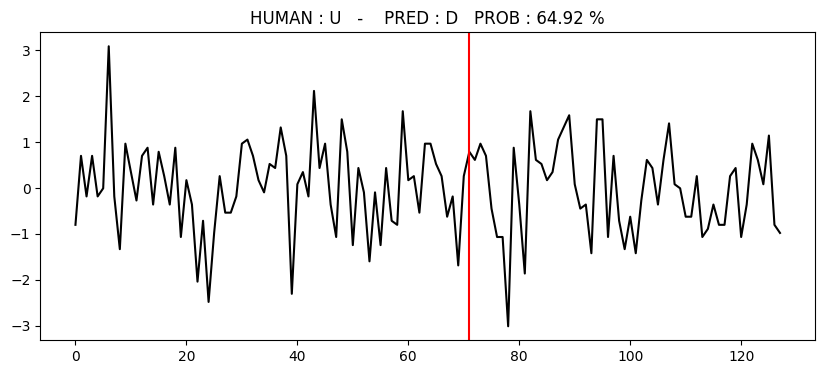

tensor([40,  0])


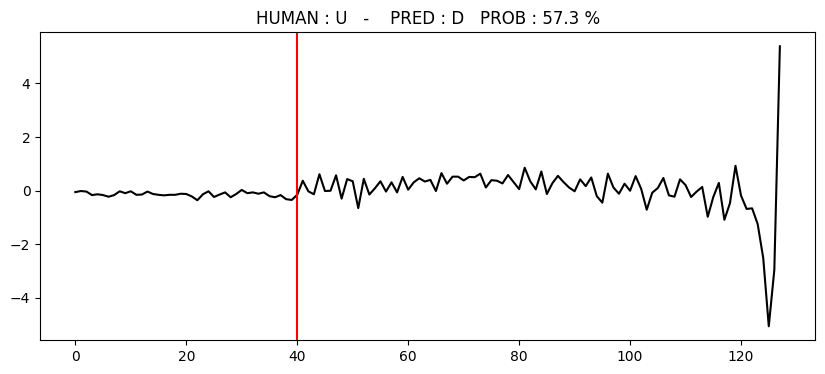

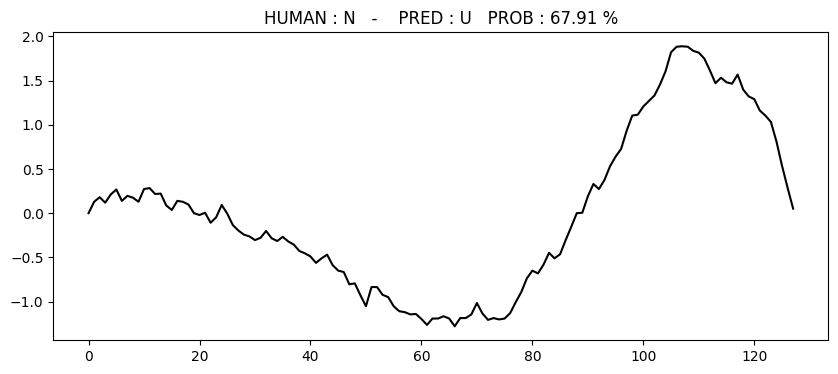

tensor([44,  0])


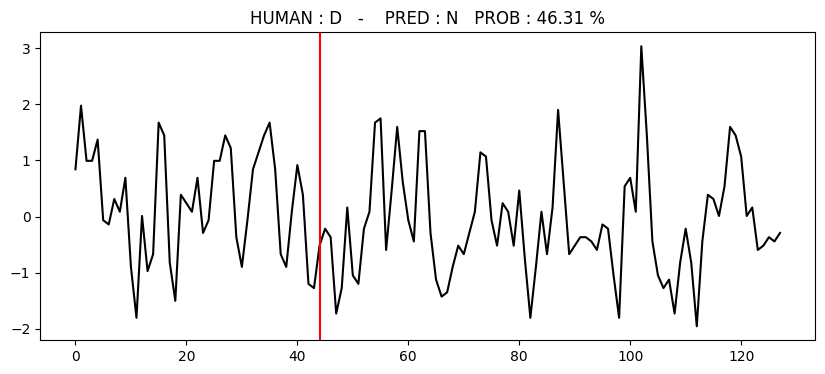

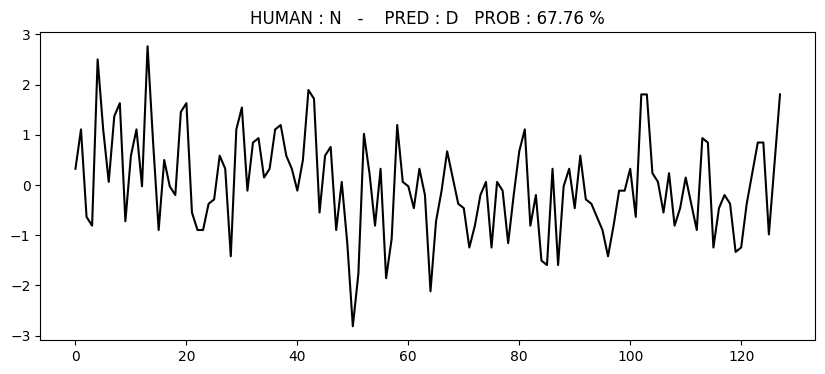

tensor([57,  0])


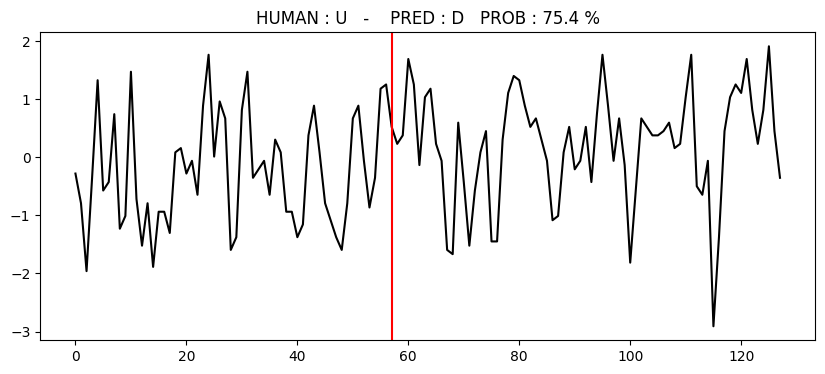

tensor([86,  0])


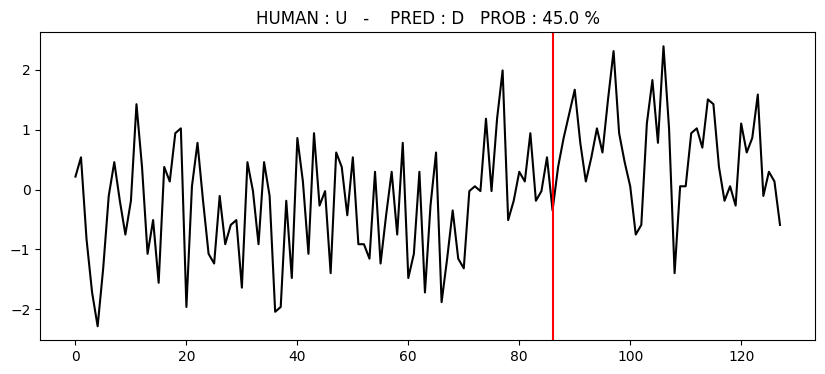

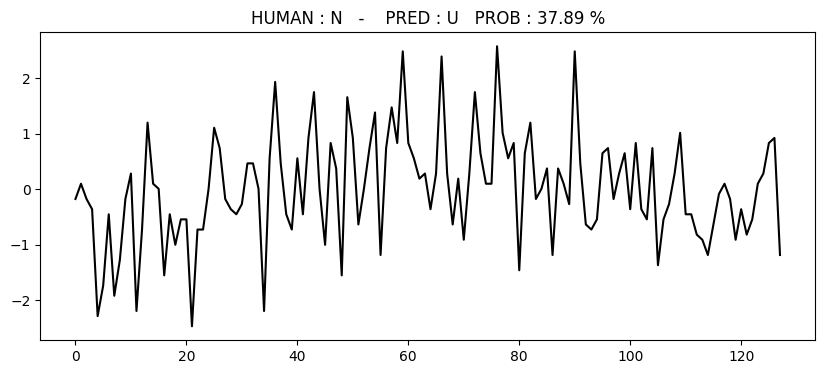

tensor([81,  0])


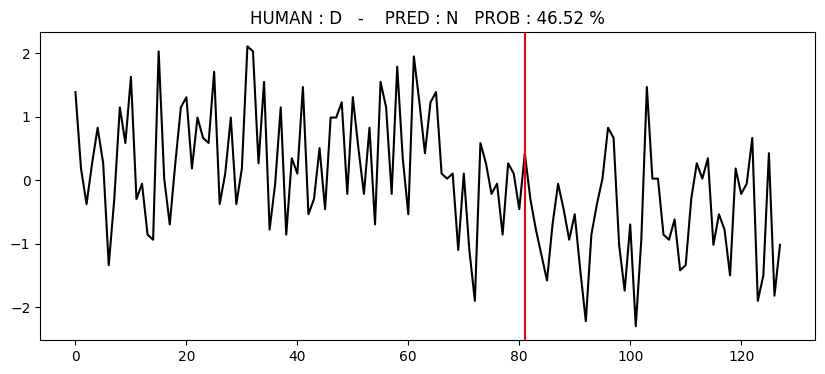

tensor([69,  0])


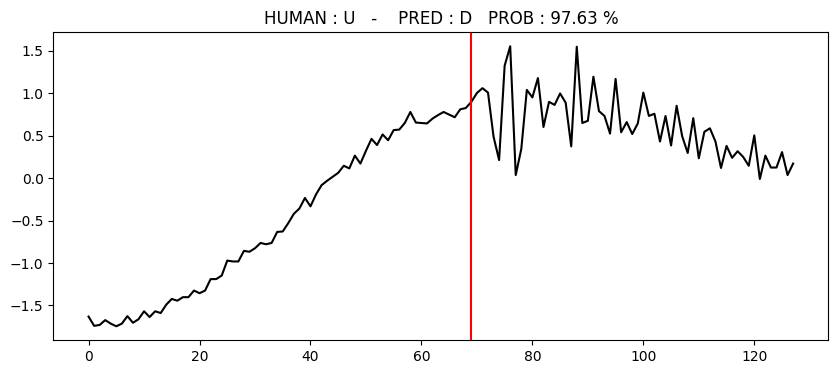

tensor([67,  0])


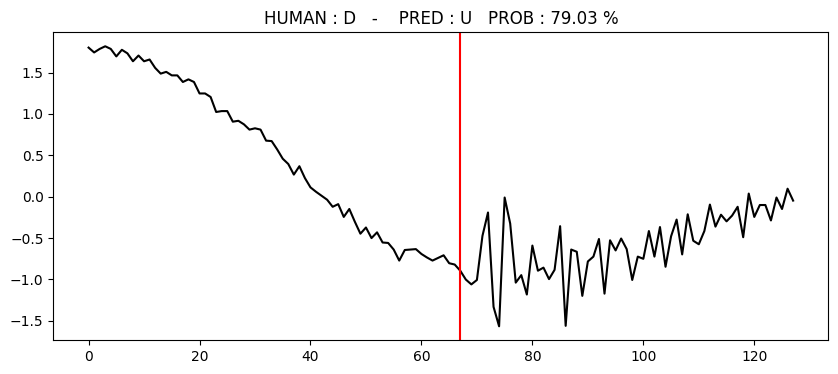

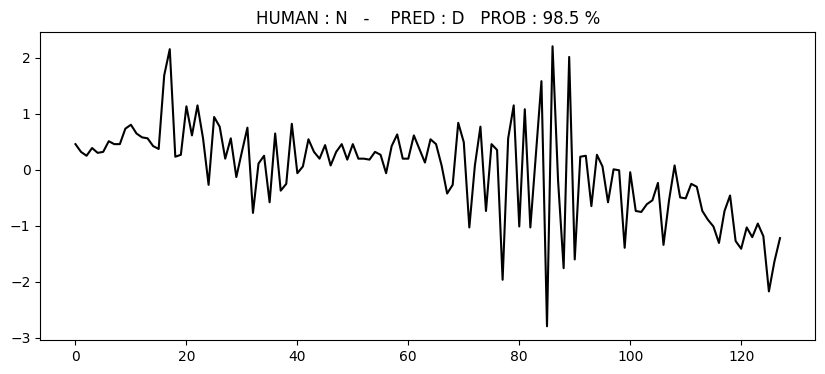

tensor([56,  0])


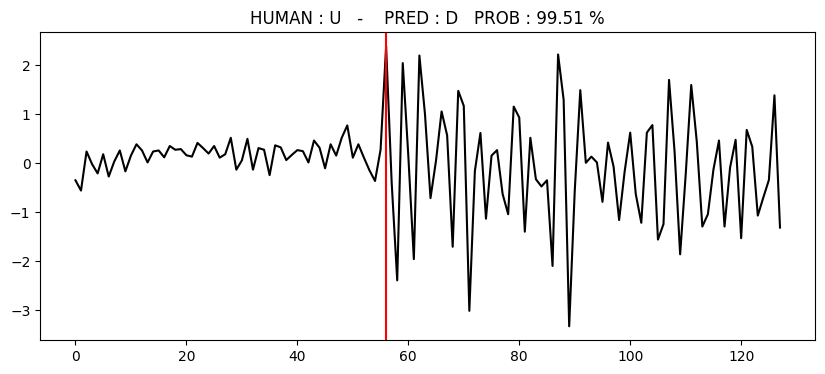

tensor([84,  0])


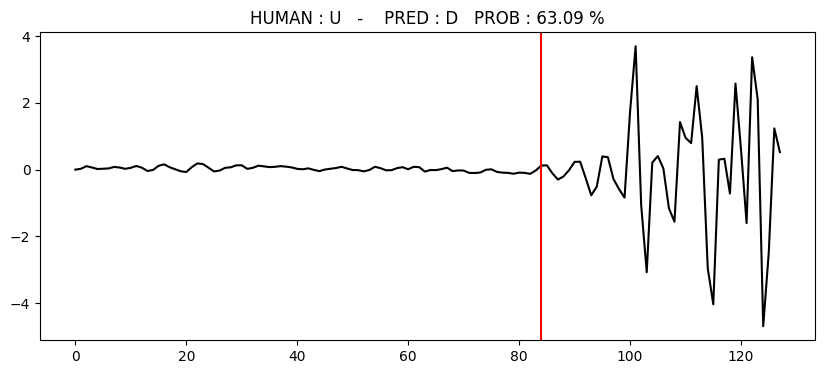

tensor([83,  0])


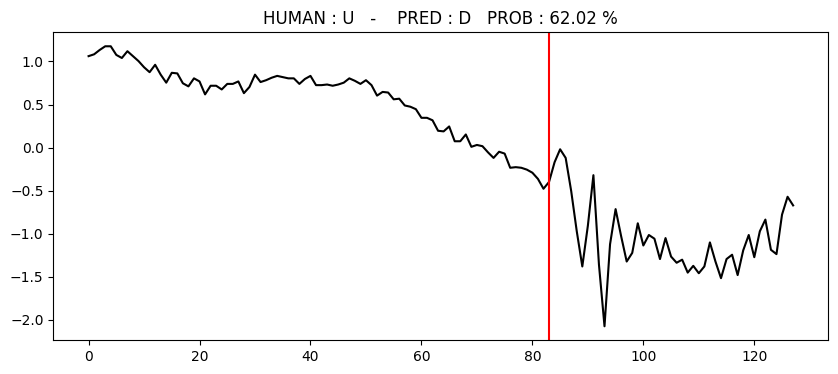

tensor([43,  0])


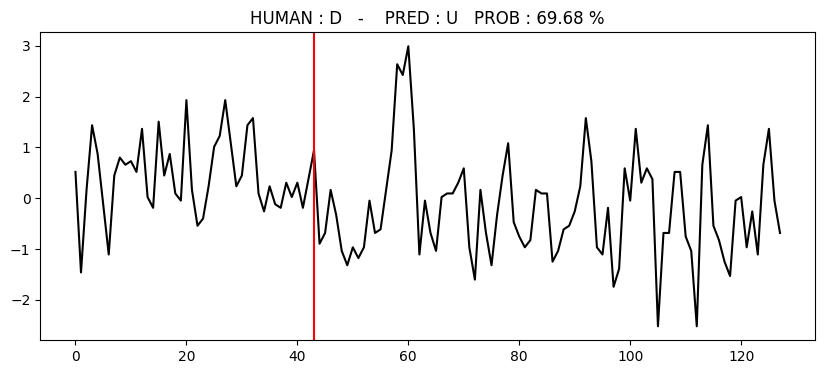

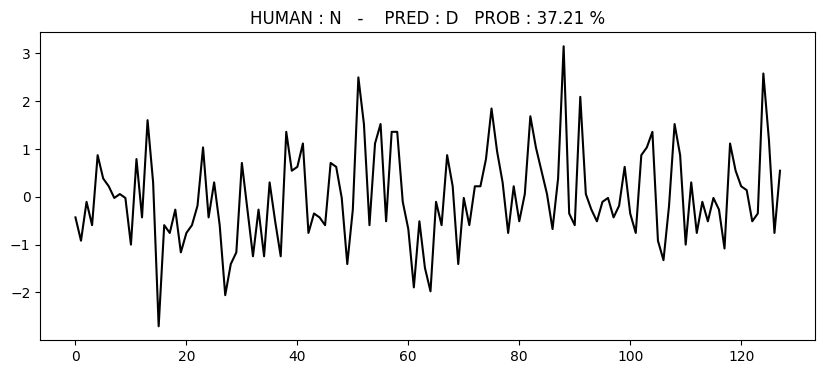

tensor([52,  0])


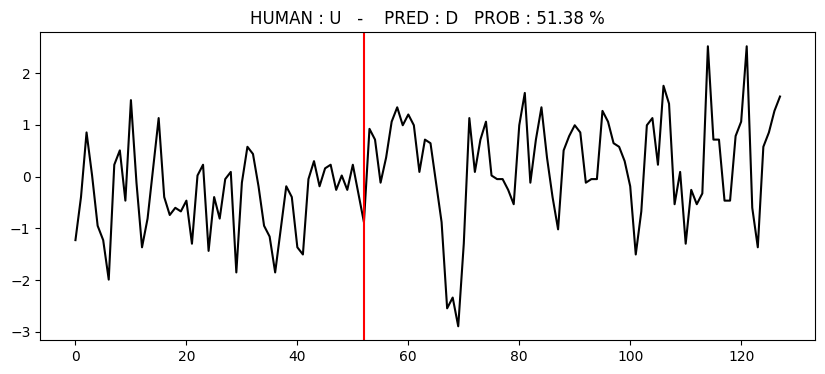

tensor([86,  0])


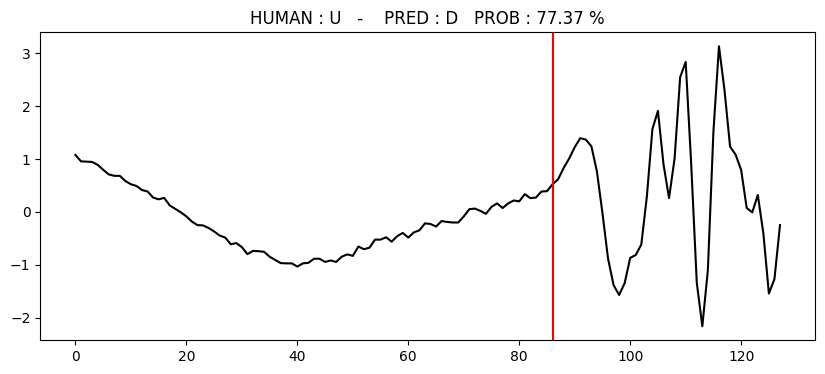

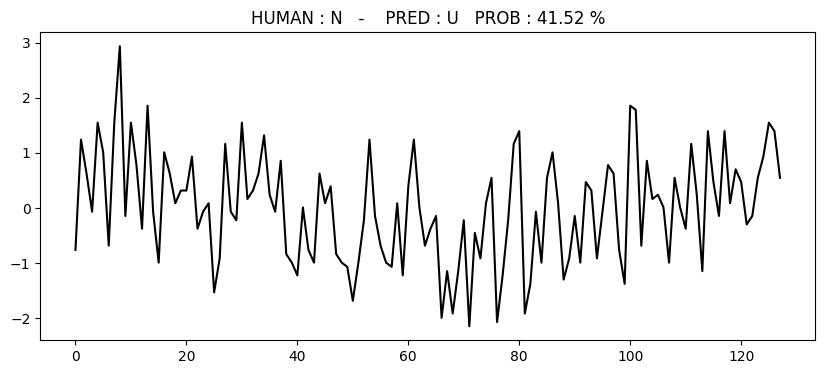

tensor([84,  0])


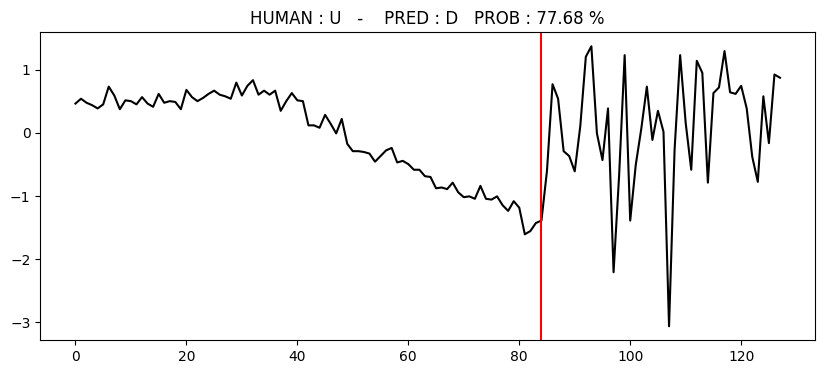

tensor([76,  0])


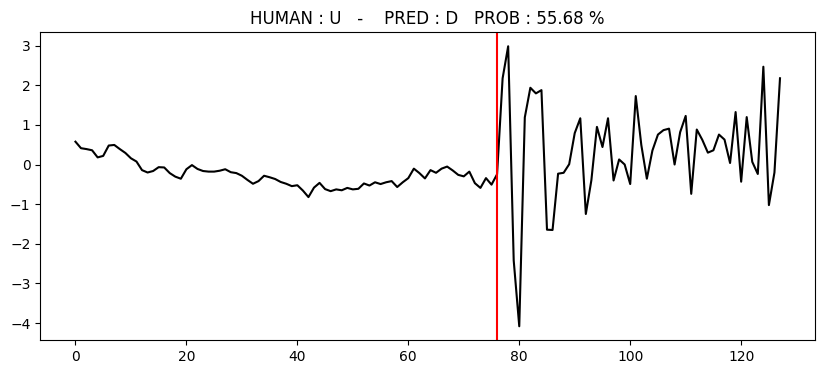

tensor([64,  0])


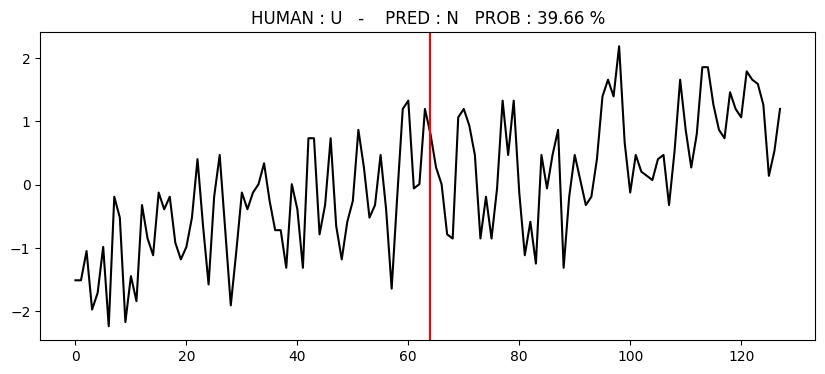

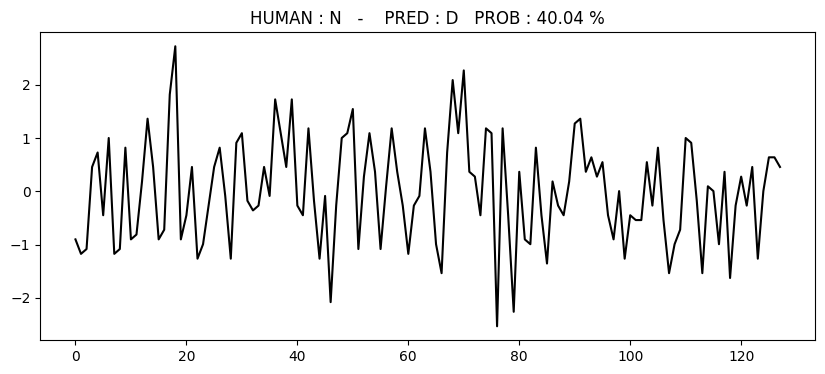

tensor([52,  0])


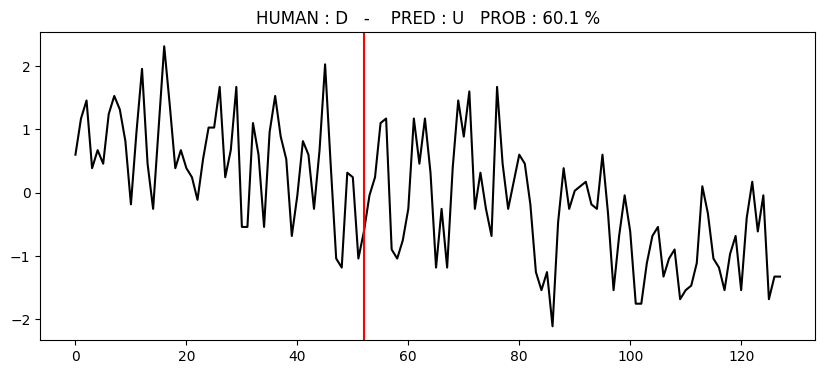

tensor([50,  0])


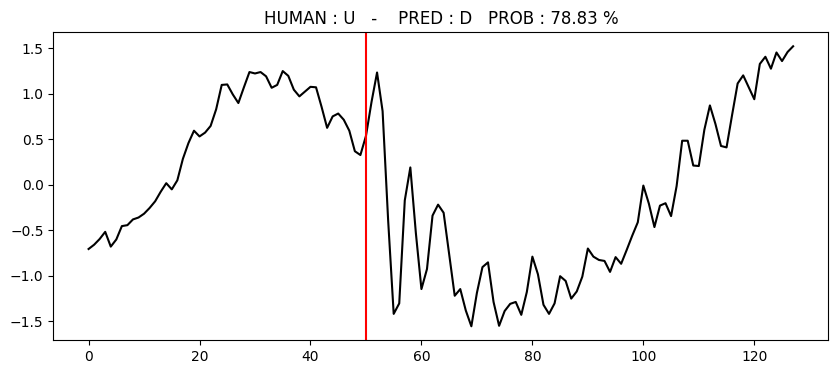

tensor([46,  0])


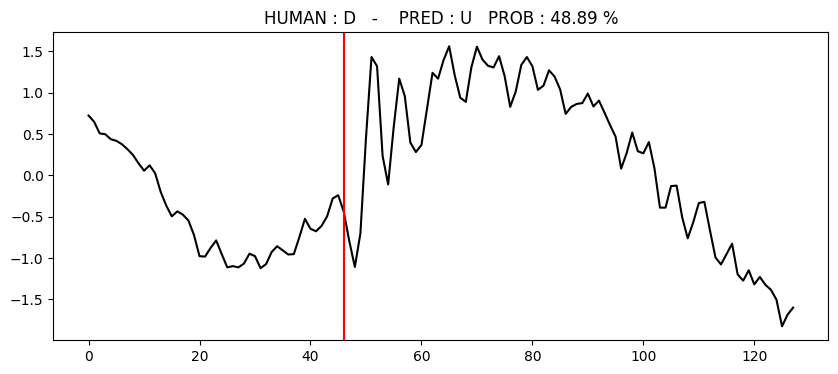

0.0023651844843897824


In [18]:
c = 0
for i in range(5000):
# for i in range(200):

    wave = waves[i:i+1]
    label_CLA = labels_CLA[i:i+1]
    label_SEG = labels_SEG[i:i+1]


    output = detector.pred(wave)
    # print(output)

    if torch.max(output,1)[1] == 0:
        p_pola = 'U'
    elif torch.max(output,1)[1] == 1:
        p_pola = 'D'
    elif torch.max(output,1)[1] == 2:
        p_pola = 'N'

    if torch.max(label_CLA,1)[1] == 0:
        h_pola = 'U'
    elif torch.max(label_CLA,1)[1] == 1:
        h_pola = 'D'
    elif torch.max(label_CLA,1)[1] == 2:
        h_pola = 'N'

    if p_pola != h_pola:

        c += 1

        fig = plt.figure(figsize=(10,4))
        # plt.subplot(2,1,1)
        plt.plot(wave[0][0,:].numpy(), c='black')
        plt.title('HUMAN : ' + h_pola + '   -    PRED : ' + p_pola+'   PROB : '+ str( round(torch.max(output,1)[0].item()*100,2) ) + ' %')

        if h_pola == 'U' or h_pola == 'D':
            pidx = torch.max(label_SEG[0,:],1)[1]
            print(pidx)
            plt.axvline(x=pidx[0], c='red')

        # plt.subplot(2,1,2)
        # plt.plot(label_SEG[0][0,:].numpy())

        plt.show()
        plt.close()

        if c == 30:
          break

print(c/waves.shape[0])

In [ ]:
print(waves.shape)

torch.Size([12684, 1, 128])
